## Simple VQC classifier
***Wine classification into three categories: 1, 2 and 3***

In [1]:
from qiskit import BasicAer
from qiskit.utils import QuantumInstance, algorithm_globals
from qiskit.algorithms.optimizers import COBYLA
from qiskit.circuit.library import TwoLocal
from qiskit_machine_learning.algorithms import VQC
from qiskit_machine_learning.datasets import wine
from qiskit_machine_learning.circuit.library import RawFeatureVector

### Define data set dimensions

In [2]:
# Define seed for replication
seed = 1376
algorithm_globals.random_seed = seed

# Use Wine data set for training and test data
feature_dim = 4  # dimension of each data point
training_size = 12
test_size = 4

### Obtain and split data

In [3]:
# training features, training labels, test features, test labels as np.array,
# one hot encoding for labels
training_features, training_labels, test_features, test_labels = \
    wine(training_size=training_size, test_size=test_size, n=feature_dim)

### Prepare a VQC model with COBYLA optimizer (no gradient descend)

Cannot compute gradient operator! Continuing without gradients!


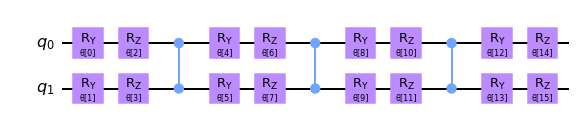

In [4]:
feature_map = RawFeatureVector(feature_dimension=feature_dim)
ansatz = TwoLocal(feature_map.num_qubits, ['ry', 'rz'], 'cz', reps=3)
vqc = VQC(feature_map=feature_map,
          ansatz=ansatz,
          optimizer=COBYLA(maxiter=100),
          quantum_instance=QuantumInstance(BasicAer.get_backend('statevector_simulator'),
                                           shots=1024,
                                           seed_simulator=seed,
                                           seed_transpiler=seed)
          )
ansatz.draw(output='mpl')

### Train the VQC model

In [5]:
vqc.fit(training_features, training_labels)

### Score the model

In [6]:
score = vqc.score(test_features, test_labels)
print('Testing accuracy: {:0.2f}'.format(score))

Testing accuracy: 1.00
